In this mission, we'll be calculating statistics using data from the National Basketball Association (NBA).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nba_stats = pd.read_csv("nba_2013.csv")

In [3]:
nba_stats.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
nba_stats.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [5]:
nba_stats[["age","pts","ast","fg.","pf","mp"]].describe()

,age,pts,ast,fg.,pf,mp
count,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000
mean,26.509356,516.582121,112.536383,0.436436,105.869023,1237.386694
std,4.198265,470.422228,131.019557,0.098672,71.213627,897.258840
min,19.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,115.000000,20.000000,0.400500,44.000000,388.000000
50%,26.000000,401.000000,65.000000,0.438000,104.000000,1141.000000
75%,29.000000,821.000000,152.000000,0.479500,158.000000,2016.000000
max,39.000000,2593.000000,721.000000,1.000000,273.000000,3122.000000


While we've looked at the mean briefly before, it has an interesting property we'd like to point out here.

If we subtract the mean of a set of numbers from each of the numbers within that set, the overall total of all of the differences will always add up to zero.

That's because the mean is the "center" of the data. All of the differences that are negative will always cancel out all of the differences that are positive. Let's look at some examples to verify this.

Let's also become familiar with the mathematical symbol for the mean:

$ \Huge\mu_\boldsymbol{x}$

This symbol means "the average of all of the values in x." The fact that x is lowercase and in bold indicates that it's a vector.

$\Huge\overline{\boldsymbol{x}}$

The bar over the top indicates "the average of".

In [6]:
# Make a list of values
values = [2, 4, 5, -1, 0, 10, 8, 9]

# Compute the mean of the values
values_mean = sum(values) / len(values)
print(values_mean)

# Find the difference between each of the values and the mean by subtracting the mean from each value.
differences = [i - values_mean for i in values]
print(differences)

# This equals 0.  If you'd like, try changing the values around to verify that it still equals 0.
print(sum(differences))

4.625
[-2.625, -0.625, 0.375, -5.625, -4.625, 5.375, 3.375, 4.375]
0.0


In [7]:
# Find the median of the values list. Assign the result to values_median.
values_median = np.median(values)
print(values_median)

# Subtract the median from each element in values.
differences = [i - values_median for i in values]
print(differences)

# Sum up all of the differences, and assign the result to median_difference_sum.
median_difference_sum = sum(differences)
print(median_difference_sum)

4.5
[-2.5, -0.5, 0.5, -5.5, -4.5, 5.5, 3.5, 4.5]
1.0


Let's look at **variance** in the data. Variance tells us how concentrated or "spread out" the data is around the mean.

We looked at kurtosis earlier, which measures the shape of a distribution. Variance directly measures how far the average data point is from the mean.

We calculate variance by subtracting every value from the mean, squaring the results, and then averaging them. Mathemically, this looks like this:

$\sigma^2 = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu _x)^2} {n}$

$\sigma^2$ is variance, and $\sum_{i=1}^{n}$ means "the sum from 1 to n", where n is the number of elements in a vector.

This formula goes through the exact same process we just described, and is the most common way to represent it.

In [8]:
# We've already loaded the NBA data into the nba_stats variable.
# Find the mean value of the column.
pf_mean = nba_stats["pf"].mean()

# Initialize variance at zero.
variance = 0

# Loop through each item in the "pf" column.
for p in nba_stats["pf"]:
    # Calculate the difference between the mean and the value.
    difference = p - pf_mean
    # Square the difference. This ensures that the result isn't negative.
    # If we didn't square the difference, the total variance would be zero.
    # ** in python means "raise whatever comes before this to the power of whatever number is after this."
    square_difference = difference ** 2
    # Add the difference to the total.
    variance += square_difference
    
# Average the total to find the final variance.
variance = variance / len(nba_stats["pf"])

print(variance)

5060.83731485


In [9]:
# Compute the variance of the data set's "pts" column, which holds the total number of points each player scored.
# Assign the result to point_variance.
point_variance = np.var(nba_stats["pts"])

print(point_variance)

220836.99585496247


We've been multiplying and dividing values, but we haven't really discussed the order of operations yet.

The order of operations defines the sequence in which mathematical operations occur. 

Exponents occur first. That means if we raise something to a power (x \*\* y), that operation will execute before anything else.

Multiplication (x * y) and division (x / y) occur next. They are equal to each other in priority.

Addition (x + y) and subtraction (x - y) will occur last. They are also equal to each other in priority.

So raising something to a power will always happen first, then any multiplication/division, and finally any addition/subtraction.

In [10]:
# You may be wondering why multiplication and division are on the same level.
# It doesn't matter whether we do the multiplication or division first; the answer here will always be the same.
# In this case, we need to think of division as multiplication by a fraction.
# Otherwise, we'll be dividing more than we want to.
# Create a formula
a = 5 * 5 / 2
# Multiply by 1/2 instead of dividing by 2. The result is the same (2/2 == 2 * 1/2).
a_subbed = 5 * 5 * 1/2
a_mul_first = 25 * 1/2
a_div_first = 5 * 2.5
print(a_mul_first == a_div_first)

# The same is true for subtraction and addition.
# In this case, we need to convert subtraction into adding a negative number.
# If we don't we'll end up subtracting more than we expect.
b = 10 - 8 + 5
# Add -8 instead of subtracting 8.
b_subbed = 10 + -8 + 5
b_sub_first = 2 + 5
b_add_first = 10 + -3
print(b_sub_first == b_add_first)

True
True


In [11]:
c = 10 / 2 + 5
d = 3 - 1 / 2 * 2

# Change the mathematical operations around so that c equals 25 and d equals .5.
c = 10 * 2 + 5
d = 3 - 1 / 2 - 2

print(c)
print(d)

25
0.5


We can use parentheses to override the order of operations and make something happen first.

In [12]:
a = 50 * 50 - 10 / 5
a_paren = 50 * (50 - 10) / 5
print(a_paren)

# If we put multiple operations inside parentheses,
# the interpreter will use the order of operations to determine the sequence in which it should execute them.
a_paren = 50 * (50 - 10 / 5)
print(a_paren)

400.0
2400.0


In [13]:
b = 10 * 10 + 100
c = 8 - 6 * 100

# Use parentheses to make b equal 1100.
b = 10 * (10 + 100)
print(b)

# Use parentheses to make c equal 200.
c = (8 - 6) * 100
print(c)

1100
200


Before we explore variance in greater depth, let's take a quick look at exponents.

In [14]:
a = 5 ** 2
print(a)

# Raise to the fourth power
b = 10 ** 4
print(b)

# Take the square root ( 3 * 3 == 9, so the answer is 3)
c = 9 ** (1/2)
print(c)

# Take the cube root (4 * 4 * 4 == 64, so 4 is the cube root)
d = 64 ** (1/3)
print(d)

25
10000
3.0
3.9999999999999996


In [15]:
# Raise 11 to the fifth power. Assign the result to e.
e = 11 ** 5
print(e)

# Take the fourth root of 10000. Assign the result to f.
f = 10000 ** (1/4)
print(f)

161051
10.0


**Standard deviation** is the most common way to refer to the distance between data points and the mean. It's a very useful concept and a great way to measure the density of a data set.

While it may sound complicated, standard deviation is fairly straightforward; it's the square root of the variance.

Here's the mathematical formula for standard deviation:

$\sigma = \sqrt{\frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu _x)^2} {n}}$

Statisticians and data scientists typically measure the percentage of data that falls within one or two standard deviations of the mean.

In [16]:
# Write a function that calculates the standard deviation of a given column in the nba_stats data.
def calc_column_deviation(column):
    mean = column.mean()
    variance = 0
    for p in column:
        difference = p - mean
        square_difference = difference ** 2
        variance += square_difference
    variance = variance / len(column)
    return variance ** (1/2)

# Use the new function to calculate the standard deviation of the minutes played column ("mp").
# Assign the results to mp_dev.
mp_dev = calc_column_deviation(nba_stats["mp"])
print(mp_dev)

# Use the function to calculate the standard deviation of the assists column ("ast").
# Assign the results to ast_dev.
ast_dev = calc_column_deviation(nba_stats["ast"])
print(ast_dev)

896.32565278
130.883290708


The standard deviation is very useful because it lets us compare the points in a distribution to the mean.

We can say that a certain point is "two standard deviations away from the mean," for example. This gives us a way to compare data density across different charts.

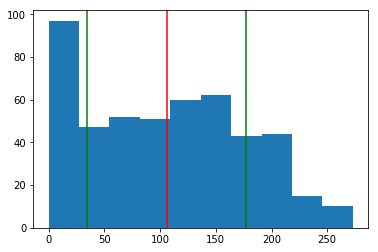

mean = 105.869023
std_dev = 71.213627
point_0 = 122.000000
standard_deviation_distance_0 = 0.226515


In [17]:
plt.hist(nba_stats["pf"])

mean = nba_stats["pf"].mean()
plt.axvline(mean, color="r")

# We can calculate standard deviation by using the std() method on a pandas series.
std_dev = nba_stats["pf"].std()

# Plot a line one standard deviation below the mean.
plt.axvline(mean - std_dev, color="g")

# Plot a line one standard deviation above the mean.
plt.axvline(mean + std_dev, color="g")

# We can see how many of the data points fall within one standard deviation of the mean.
# The more that fall into this range, the more dense the data is.
plt.show()

# We can calculate how many standard deviations a data point is from the mean by doing some subtraction and division.
# First, we find the total distance by subtracting the mean.
total_distance = nba_stats["pf"][0] - mean

# Then we divide by standard deviation to find how many standard deviations away the point is.
standard_deviation_distance = total_distance / std_dev

print("mean = %f"%mean)
print("std_dev = %f"%std_dev)
print("point_0 = %f"%nba_stats["pf"][0])
print("standard_deviation_distance_0 = %f"%standard_deviation_distance)

In [18]:
point_10 = nba_stats["pf"][9]
point_100 = nba_stats["pf"][99]

# Find how many standard deviations away from the mean point_10 is. Assign the result to point_10_std.
point_10_std = (point_10-mean)/std_dev

# Find how many standard deviations away from the mean point_100 is. Assign the result to point_100_std.
point_100_std = (point_100-mean)/std_dev

print("mean = %f"%mean)
print("std_dev = %f"%std_dev)
print("point_10 = %f"%point_10)
print("point_10_std = %f"%point_10_std)
print("point_100 = %f"%point_100)
print("point_100_std = %f"%point_100_std)

mean = 105.869023
std_dev = 71.213627
point_10 = 121.000000
point_10_std = 0.212473
point_100 = 141.000000
point_100_std = 0.493318


The **normal distribution** is a special kind of distribution. You might recognize it more commonly as a bell curve.

The normal distribution is found in a variety of natural phenomena. If we made a histogram of the heights of everyone on the planet, for example, it would be more or less a normal distribution.

We can generate a normal distribution by using a **probability density function**.

In [19]:
from scipy.stats import norm

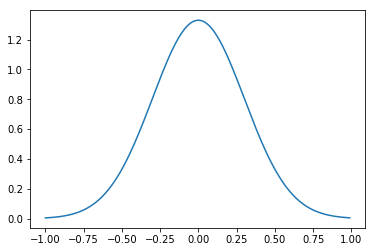

In [20]:
# The arange function generates a numpy vector
# The vector below will start at -1, and go up to, but not including 1
# It will proceed in "steps" of .01.
# So the first element will be -1, the second -.99, the third -.98, all the way up to .99.
points = np.arange(-1, 1, 0.01)

# The norm.pdf function will take the points vector and convert it into a probability vector
# Each element in the vector will correspond to the normal distribution
# (earlier elements and later element smaller, peak in the center)
# The distribution will be centered on 0, and will have a standard devation of .3
probabilities = norm.pdf(points, 0, .3)

# Plot the points values on the x-axis and the corresponding probabilities on the y-axis
# See the bell curve?
plt.plot(points, probabilities)
plt.show()

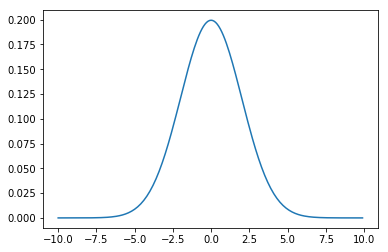

In [21]:
# Make a normal distribution across the range that starts at -10, ends at 10, and has the step .1.
points = np.arange(-10, 10, 0.1)

# The distribution should have a mean of 0 and standard deviation of 2.
probabilities = norm.pdf(points, 0, 2)

plt.plot(points, probabilities)
plt.show()

One cool thing about normal distributions is that for every single one, the same percentage of the data is within one standard deviation of the mean, the same percentage is within two standard deviations of the mean, and so on.

About 68% of the data is within one standard deviation, roughly 95% is within two standard deviations, and about 99% is within three standard deviations.

This helps us quickly understand where values fall within the data set, as well as how typical or unusual they are.

In [22]:
# Housefly wing lengths in millimeters
wing_lengths = [36, 37, 38, 38, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 52, 52, 53, 53, 54, 55]

In [23]:
# For each point in wing_lengths, calculate the distance from the mean in number of standard deviations.
mean = np.mean(wing_lengths)
std_dev = np.std(wing_lengths)
std_devs = [(i-mean)/std_dev for i in wing_lengths]

def within_percentage(devs, count):
    return len([i for i in devs if i<=count and i>=-count])/len(devs)

# Calculate the percentage of the data that's within one standard deviation of the mean.
# Assign the result to within_one_percentage.
within_one_percentage = within_percentage(std_devs,1)
print(within_one_percentage)

# Calculate the percentage of the data that's within two standard deviations of the mean.
# Assign the result to within_two_percentage.
within_two_percentage = within_percentage(std_devs,2)
print(within_two_percentage)

# Calculate the percentage of the data that's within three standard deviations of the mean.
# Assign the result to within_three_percentage.
within_three_percentage = within_percentage(std_devs,3)
print(within_three_percentage)

0.68
0.96
1.0


We've spent a lot of time looking at single variables and how their distributions look. While distributions are interesting on their own, it can also be revealing to look at how two variables correlate with each other.

Much of statistics deals with analyzing how variables impact each other, and the first step is to graph them out with a scatterplot.

While graphing them out, we can look at correlation. If two variables change together (ie, when one goes up, the other goes up), we know that they are correlated.

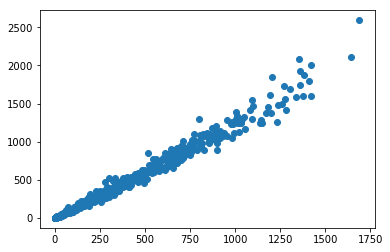

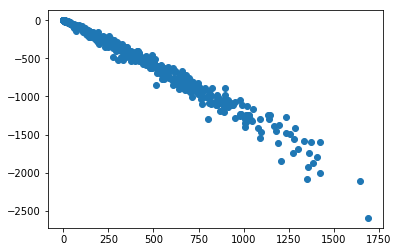

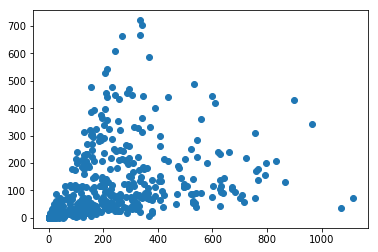

In [24]:
# Plot field goals attempted (number of shots someone takes in a season) vs. point scored in a season.
# Field goals attempted is on the x-axis, and points is on the y-axis.
# As you can tell, they are very strongly correlated. The plot is close to a straight line.
# The plot also slopes upward, which means that as field goal attempts go up, so do points.
# That means that the plot is positively correlated.
plt.scatter(nba_stats["fga"], nba_stats["pts"])
plt.show()

# If we make points negative (so the people who scored the most points now score the least,
# because 3000 becomes -3000), we can change the direction of the correlation.
# Field goals are negatively correlated with our new "negative" points column -- the more free throws you attempt,
# the less negative points you score.
# We can see this because the correlation line slopes downward.
plt.scatter(nba_stats["fga"], -nba_stats["pts"])
plt.show()

# Now, we can plot total rebounds (number of times someone got the ball back for their team after someone shot)
# vs total assists (number of times someone helped another person score).
# These are uncorrelated, so you don't see the same nice line as you see with the plot above.
plt.scatter(nba_stats["trb"], nba_stats["ast"])
plt.show()

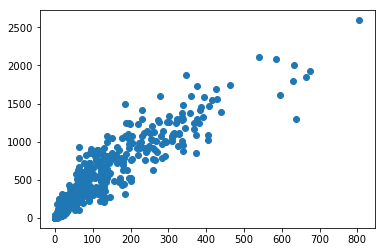

In [25]:
# Make a scatterplot of the "fta" (free throws attempted) column against the "pts" column.
plt.scatter(nba_stats["fta"], nba_stats["pts"])
plt.show()

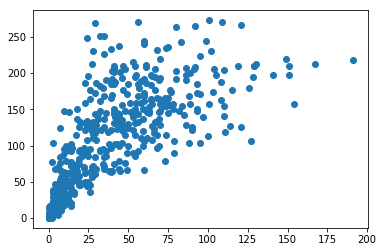

In [26]:
# Make a scatterplot of the "stl" (steals) column against the "pf" column.
plt.scatter(nba_stats["stl"], nba_stats["pf"])
plt.show()

Measuring correlation can be a big help when we need to analyze a lot of variables. This spares us from having to eyeball everything.

The most common way to measure correlation is to use **Pearson's r**, which we also call an **r-value**.

We'll explore how the calculations work later. For now, though, we'll focus on the values.

An r-value ranges from -1 to 1, and indicates how strongly two variables are correlated.
* A 1 indicates a perfect positive correlation. This would appear as a straight, upward-sloping line on our plots.
* A 0 indicates no correlation. We'd see a scatterplot with points that appear random.
* A -1 indicates a perfect negative correlation. This would appear as a straight, downward-sloping line.

Any correlation between -1 and 0 will show up as a scattering of points. The same is true of correlations falling between 0 and 1. The closer the value is to 0, the more random the points will appear. The closer it is to -1 or 1, the more "line-like" the points will appear.

We can use a function from scipy to calculate Pearson's r.

In [27]:
from scipy.stats.stats import pearsonr

In [28]:
# The pearsonr function will find the correlation between two columns of data.
# It returns the r value and the p value.  We'll learn more about p values later on.
r, p_value = pearsonr(nba_stats["fga"], nba_stats["pts"])
# As we can see, this is a very high positive r value - it's close to 1.
print(r)

# These two columns are much less correlated.
r, p_value = pearsonr(nba_stats["trb"], nba_stats["ast"])
# We get a much lower, but still positive, r value.
print(r)

0.989211400652
0.369861731248


In [29]:
# Find the correlation between the "fta" column and the "pts" column. Assign the result to r_fta_pts.
r_fta_pts, p_value = pearsonr(nba_stats["fta"], nba_stats["pts"])
print(r_fta_pts)

0.918978538402


In [30]:
# Find the correlation between the "stl" column and the "pf" column. Assign the result to r_stl_pf.
r_stl_pf, p_value = pearsonr(nba_stats["stl"], nba_stats["pf"])
print(r_stl_pf)

0.737628216749


We looked at finding the correlation coefficient with a function. Now, let's take a brief look under the hood to see how we can do it ourselves.

Another way to think of correlation is in terms of variance.

Two variables are correlated when they both vary individually, but in similar ways. For example, correlation occurs when if one variable goes up, another variable also goes up.

This is called **covariance**. Covariance refers to how different numbers vary jointly.

There's a limit to how much two variables can co-vary. This is because each variable has its own variance. These individual variances set a maximum theoretical limit on the covariance between two variables. In other words, a set of variables can't co-vary more from the mean than the two variables individually vary from the mean.

Two variables reach the maximum possible covariance when they vary in an identical way (ie, you see a straight line on the plot).

The r-value is a ratio between the actual covariance and the maximum possible positive covariance.

Let's look at actual covariance first. Mathematically speaking, covariance between two variables looks like this:

$cov(\mathbf{x},\mathbf{y})=\frac{\sum_{i=1}^{n}(x_i-\mu _x)(y_i-\mu _y)}{n}$

For each element in the vectors x and y, we:

1. Take the value at each position from 1 to the length of the vectors.
2. Subtract the mean of the vector from those values.
3. Multiply them together at each position, and all of the resulting values together.

In [31]:
# Make a function that calculates covariance.
def cov(x, y):
    sums = 0
    count = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    for i in range(0, count):
        sums += (x[i]-x_mean)*(y[i]-y_mean)
    return sums/count

# Use the function to calculate the covariance of the "stl" and "pf" columns. Assign the result to cov_stl_pf.
cov_stl_pf = cov(nba_stats["stl"], nba_stats["pf"])
print(cov_stl_pf)

# Use the function to calculate the covariance of the "fta" and "pts" columns. Assign the result to cov_fta_pts.
cov_fta_pts = cov(nba_stats["fta"], nba_stats["pts"])
print(cov_fta_pts)

1823.35484805
56618.4139807


Now that we know how to calculate covariance, we can get the correlation coefficient using the following formula:

$\frac{cov(\mathbf{x},\mathbf{y})}{\sigma_{x}\sigma_{y}}$

For the denominator, we need to multiply the standard deviations for x and y. This is the maximum possible positive covariance, which is just both of the standard deviation values multiplied. If we divide our actual covariance by this, we get the r-value.

We can use the **std** method on any pandas DataFrame or Series to calculate the standard deviation. The following code returns the standard deviation for the pf column:

**nba_stats["pf"].std()**

We can use the **cov** function from NumPy to compute covariance, returning a 2x2 matrix. The following code returns the covariance between the pf and stl columns:

**cov(nba_stats["pf"], nba_stats["stl"])[0,1]**

In [32]:
# Compute the correlation coefficient for the fta and blk columns, and assign the result to r_fta_blk.
r_fta_blk = np.cov(nba_stats["fta"], nba_stats["blk"])[0,1]/(nba_stats["fta"].std()*nba_stats["blk"].std())
print(r_fta_blk)
print(pearsonr(nba_stats["fta"], nba_stats["blk"])[0])

0.456062822144
0.456062822144


In [33]:
# Compute the correlation coefficient for the ast and stl columns, and assign the result to r_ast_stl.
r_ast_stl = np.cov(nba_stats["ast"], nba_stats["stl"])[0,1]/(nba_stats["ast"].std()*nba_stats["stl"].std())
print(r_ast_stl)
print(pearsonr(nba_stats["ast"], nba_stats["stl"])[0])

0.770427979468
0.770427979468
